# Test the DeepQlearner attacker in the little environment

-   initialisation of the environment
-   initialisation of the DeepQlearner agent

In [1]:
from cyberbattle.agents.battle_environment import CyberBattleEnv
from cyberbattle.agents.attacker.attacker_interface import AttackerGoal
from cyberbattle.env.samples.little_network import get_little_environment_network, Dev, DSI

num_client = 5
net = get_little_environment_network(num_client)
profiles = {
    DSI(num_client): 1,
    Dev(num_client): num_client - 1
}
env = CyberBattleEnv(net, profiles, attacker_goal=AttackerGoal(nb_flag=2))

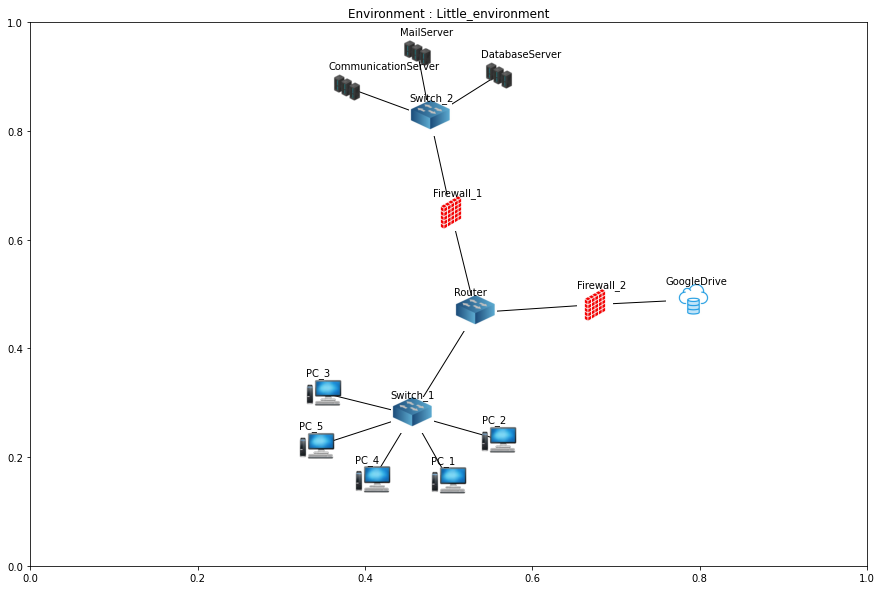

In [2]:
env.display_network()

In [3]:
env.attacker_description()

The attacker can performed the following attacks classified by their index :
{0: 'File and Directory Discovery', 1: 'Browser Session Hijacking', 2: 'Network Service Scanning', 3: 'Private Keys', 4: 'Password Spraying'}

These attacks can be performed and allow the attacker to get outcomes as follows :
{'PC_1': {'File and Directory Discovery': {'data sources triggered': 'Process', 'phase name': 'discovery', 'Type': 'Local'}}, 'PC_2': {}, 'PC_3': {}, 'PC_4': {}, 'PC_5': {'Private Keys': {'data sources triggered': 'File', 'phase name': 'credential-access', 'Type': 'Remote'}}, 'Switch_1': {}, 'Switch_2': {}, 'Router': {}, 'DatabaseServer': {'Browser Session Hijacking': {'data sources triggered': 'Logon Session', 'phase name': 'collection', 'Type': 'Local'}}, 'MailServer': {'Network Service Scanning': {'data sources triggered': 'Cloud Service', 'phase name': 'discovery', 'Type': 'Local'}}, 'CommunicationServer': {}, 'GoogleDrive': {'Password Spraying': {'data sources triggered': 'User Accou

In [4]:
from cyberbattle.agents.attacker.baseline.deepqlearning import DeepQlearner
from cyberbattle.agents.simulation import Simulation
from cyberbattle.utils.functions import exponential_espilon_decrease

decrease_function = exponential_espilon_decrease(0.01, 5000)

qleaner_agent = DeepQlearner(bounds=env.get_attacker_bounds(), features=['All'], gamma=0.015, learning_rate=0.01, clip_grad=1.0, loss="Huber loss", batch_size=512)

simulation = Simulation(env)
simulation.compile(training_method='epsilon greedy search', simulation_type='Agent vs Nothing')

Training the agent DeepQlearner
with parameters : input_dim=146, n_actions=34, lr=0.01, target_update=10, gamma=0.015, memory_length=10000, batch_size=512
against nothing.
Epsilon greedy search parameters : max_iteration=600, epochs=500 and epsilon=0.9.

Epoch : 1/500, epsilon = 0.9
600/600 [==============================] - 8s 14ms/iteration - cumulate rewards: -17672.0 - succesful actions count: 7 - failed actions count: 549 - infected machines count: 3 - model loss: 53.38929                

Epoch ended at 577 iterations - Exploit deflected to explore count : 14 - Submarine action count : 21. 

###################

Epoch : 2/500, epsilon = 0.8031572207687241
600/600 [==============================] - 14s 23ms/iteration - cumulate rewards: 1719.0 - succesful actions count: 7 - failed actions count: 140 - infected machines count: 3 - model loss: 15.758089                 

Epoch ended at 152 iterations - Exploit deflected to explore count : 25 - Submarine action count : 5. 

#########

MovieWriter PillowWriter unavailable; using Pillow instead.


saving gif 2/13 at Epoch_2.gif


MovieWriter PillowWriter unavailable; using Pillow instead.


saving gif 3/13 at Epoch_4.gif


MovieWriter PillowWriter unavailable; using Pillow instead.


saving gif 4/13 at Epoch_7.gif


MovieWriter PillowWriter unavailable; using Pillow instead.


saving gif 5/13 at Epoch_11.gif


MovieWriter PillowWriter unavailable; using Pillow instead.


saving gif 6/13 at Epoch_12.gif


MovieWriter PillowWriter unavailable; using Pillow instead.


saving gif 7/13 at Epoch_20.gif


MovieWriter PillowWriter unavailable; using Pillow instead.


saving gif 8/13 at Epoch_27.gif


MovieWriter PillowWriter unavailable; using Pillow instead.


saving gif 9/13 at Epoch_28.gif


MovieWriter PillowWriter unavailable; using Pillow instead.


saving gif 10/13 at Epoch_45.gif


MovieWriter PillowWriter unavailable; using Pillow instead.


saving gif 11/13 at Epoch_56.gif


MovieWriter PillowWriter unavailable; using Pillow instead.


saving gif 12/13 at Epoch_413.gif


MovieWriter PillowWriter unavailable; using Pillow instead.


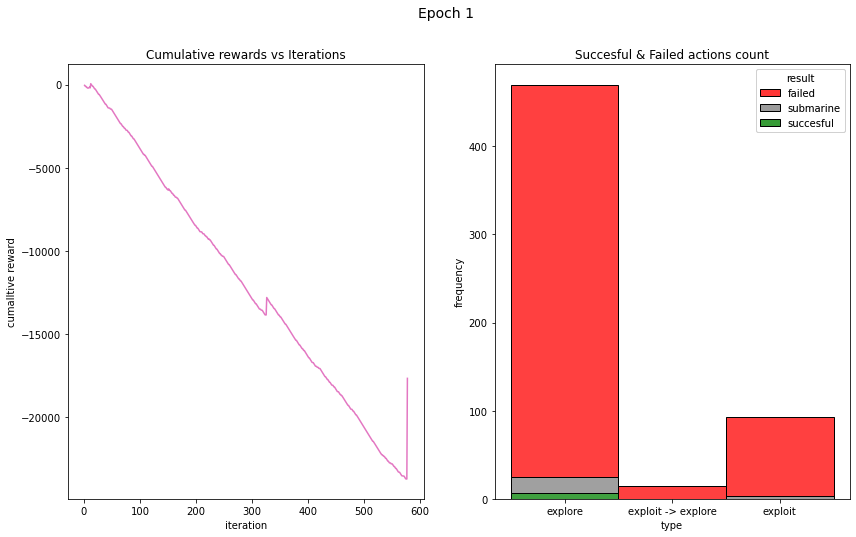

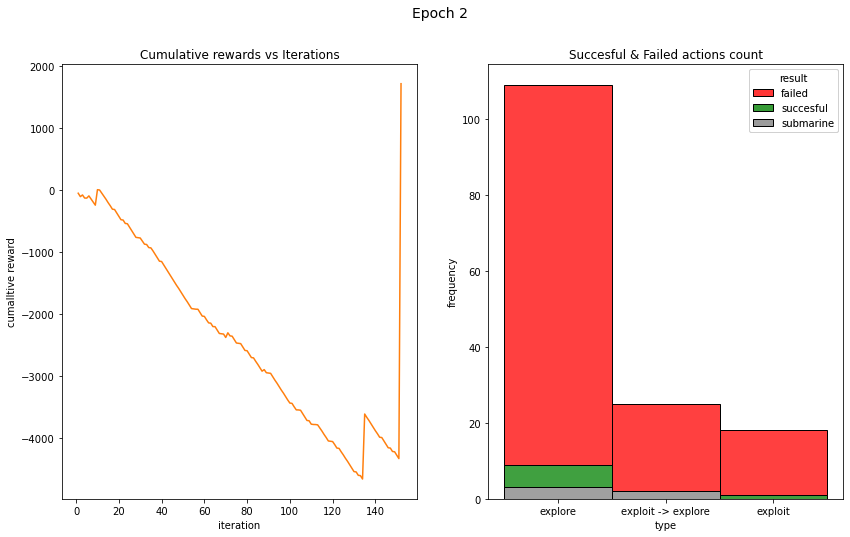

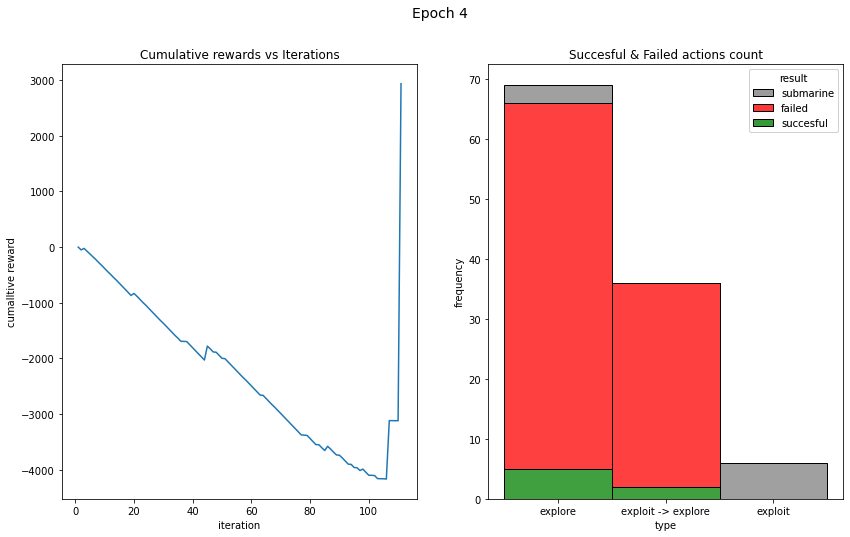

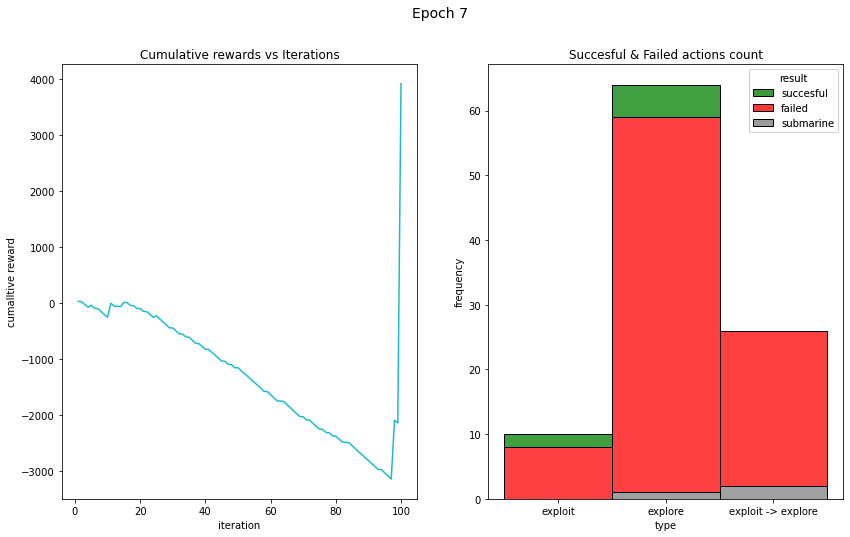

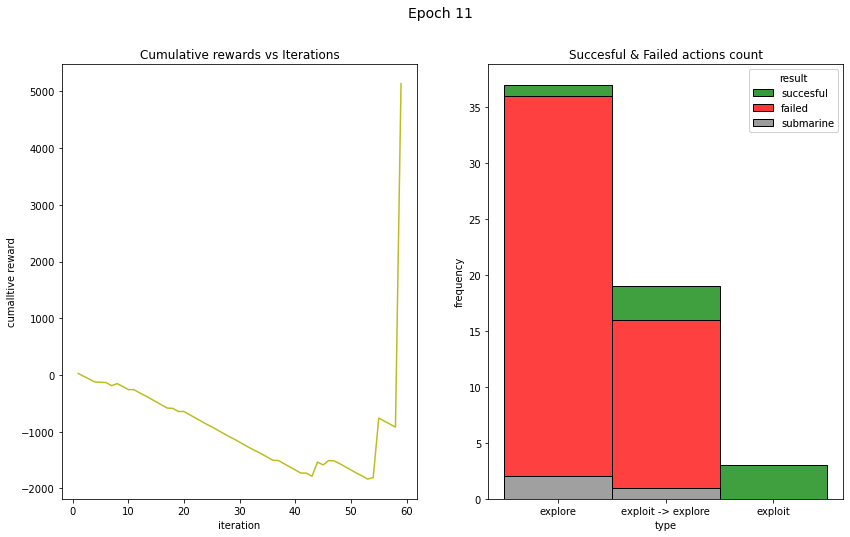

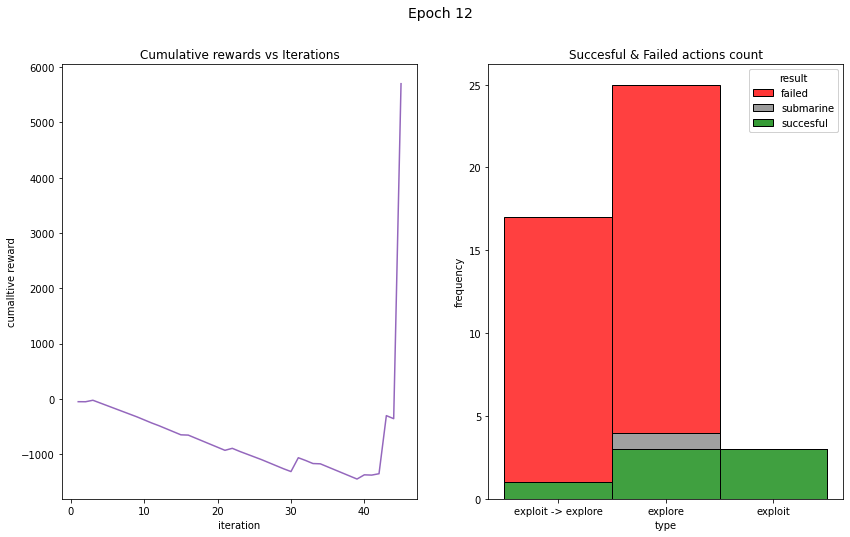

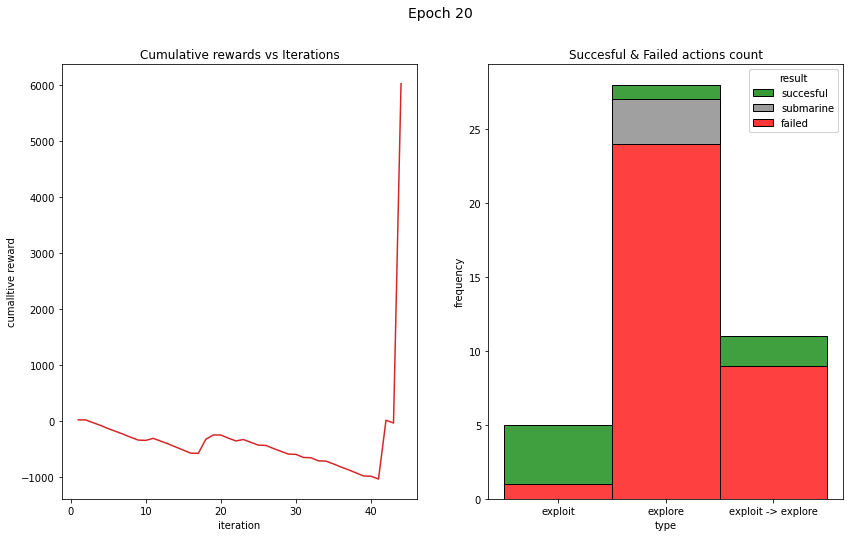

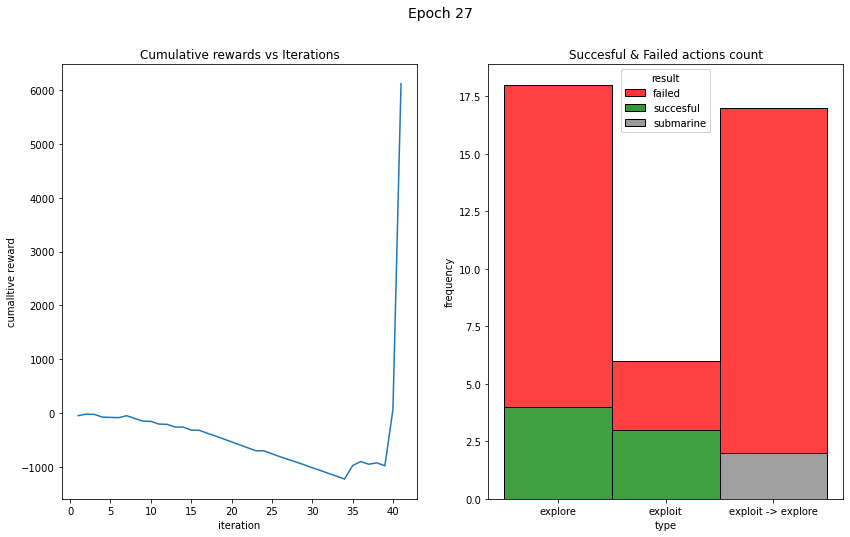

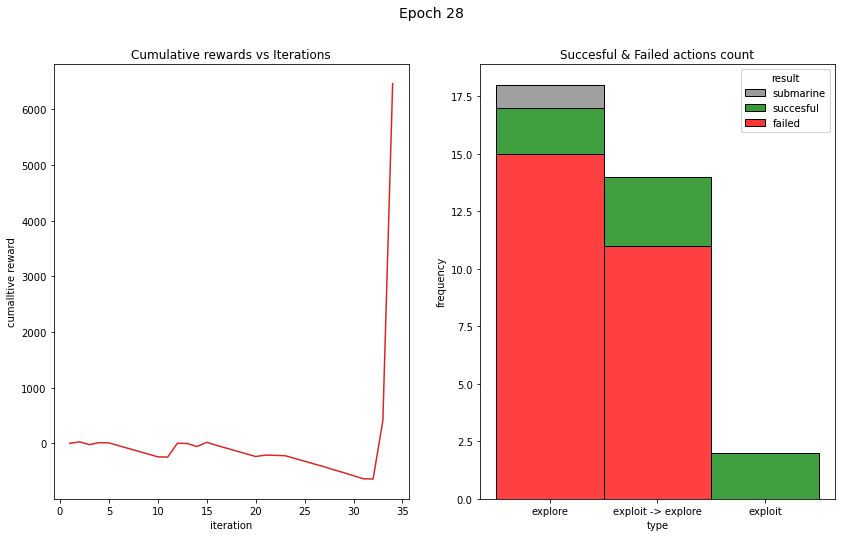

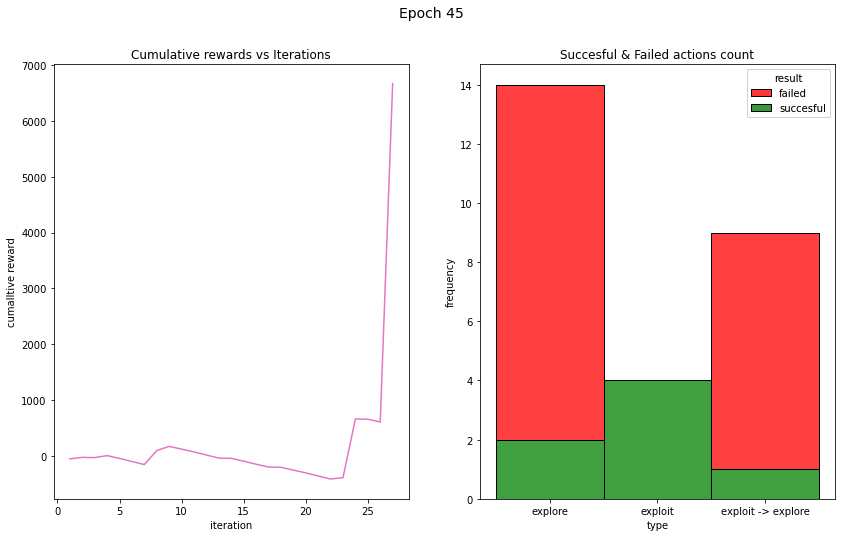

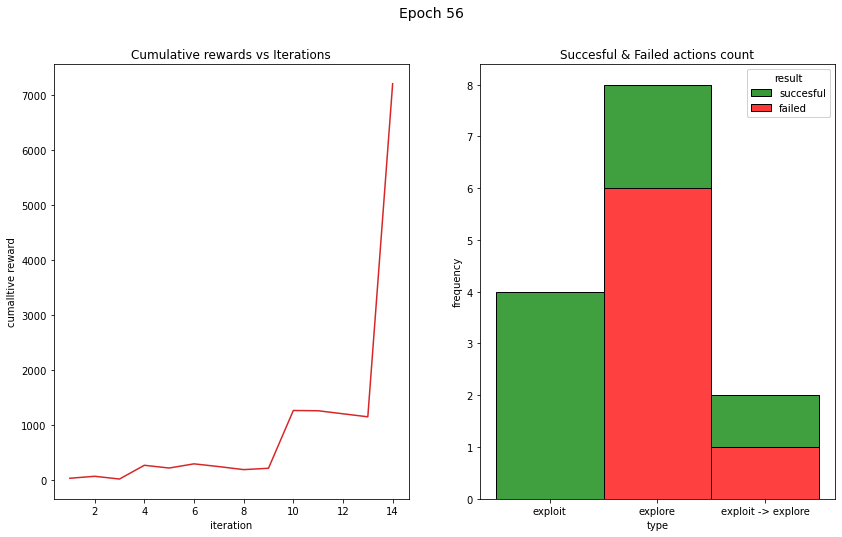

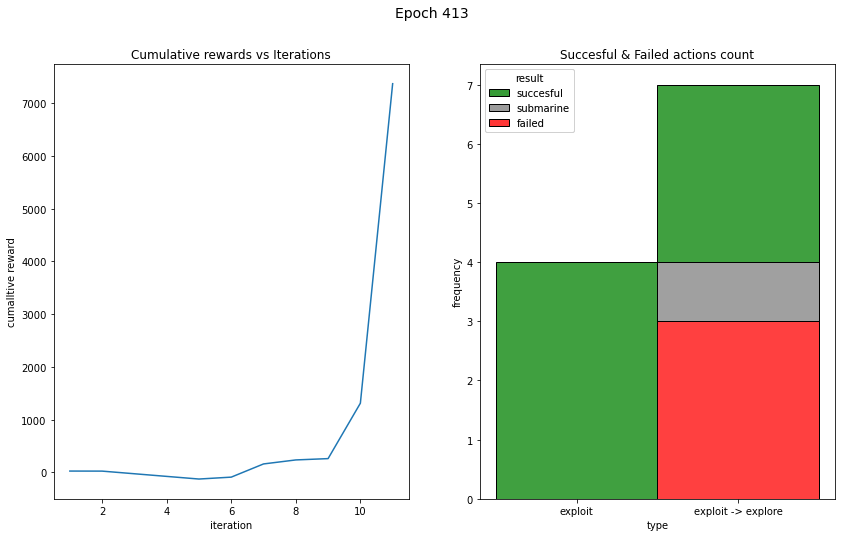

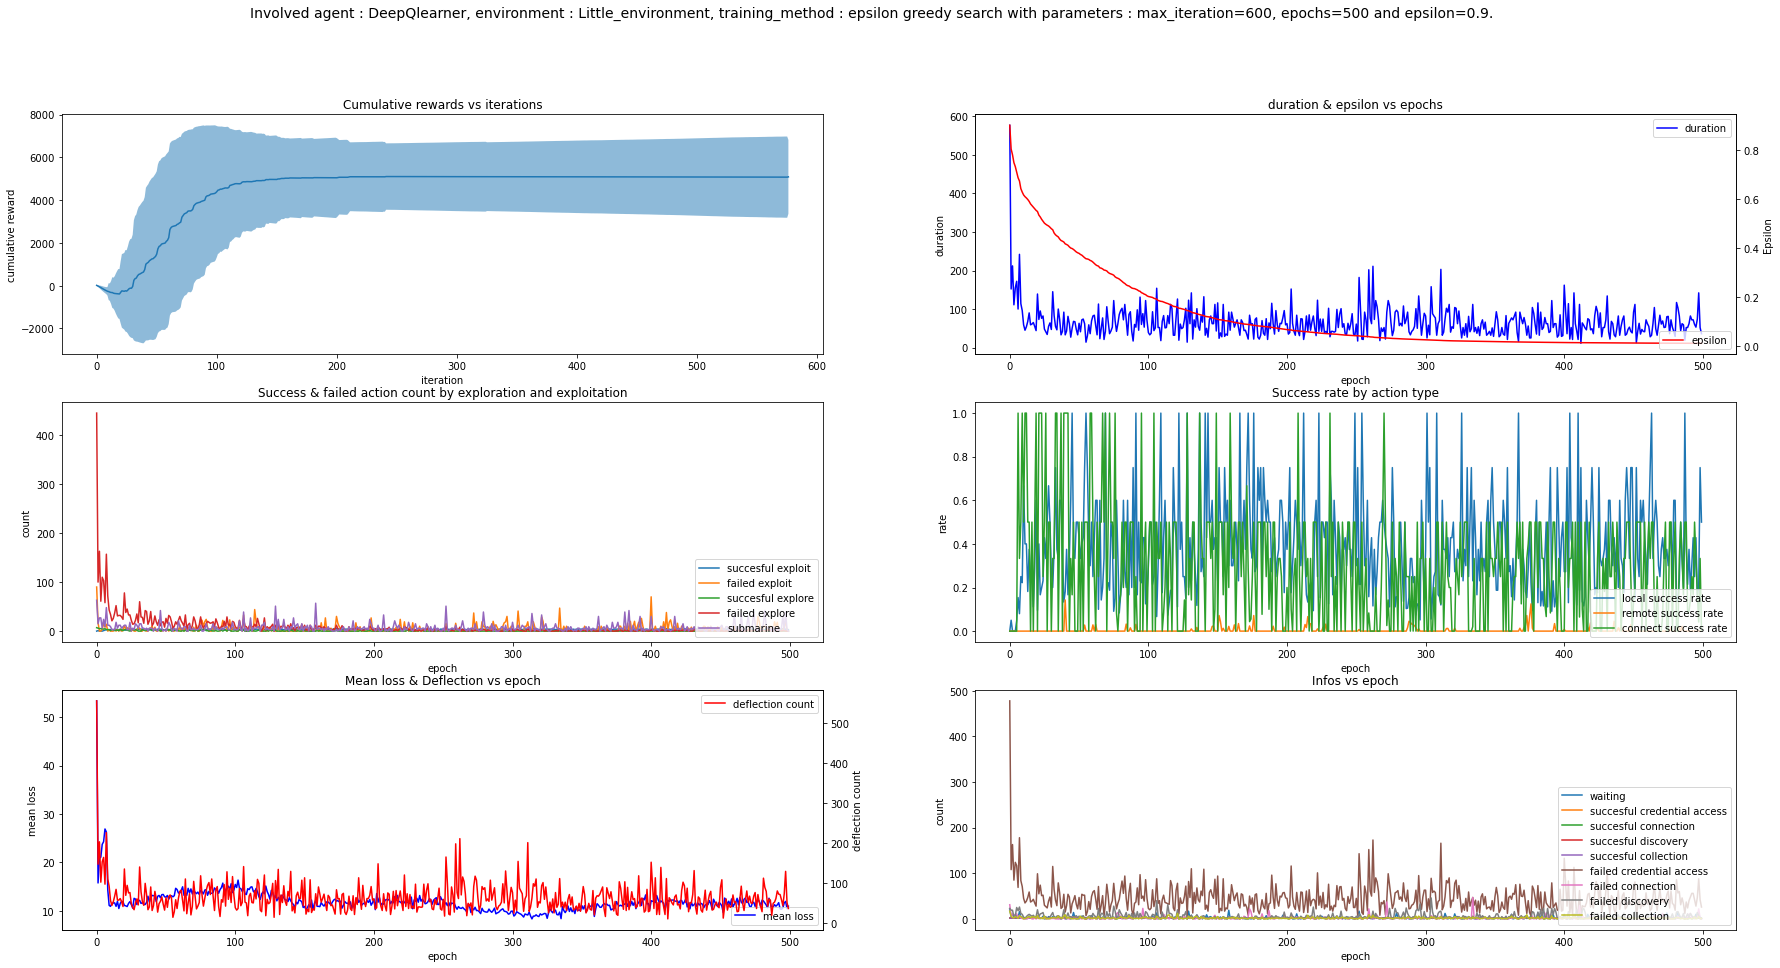

Details of a sample attack :

Remote attack deflected to explore, source : PC_1, discovered machine count : 5 <= target index : 9, attack name : Private Keys at step 2.
Remote attack deflected to explore, source : PC_1, discovered machine count : 5 <= target index : 9, attack name : Private Keys at step 3.
Remote attack deflected to explore, source : PC_1, discovered machine count : 5 <= target index : 9, attack name : Private Keys at step 4.
Remote attack deflected to explore, source : PC_1, discovered machine count : 5 <= target index : 9, attack name : Private Keys at step 5.
Remote attack deflected to explore, source : PC_1, discovered machine count : 5 <= target index : 9, attack name : Private Keys at step 6.
Remote attack deflected to explore, source : PC_1, discovered machine count : 5 <= target index : 9, attack name : Private Keys at step 7.
Remote attack deflected to explore, source : PC_1, discovered machine count : 5 <= target index : 9, attack name : Private Keys at step 

Number of exploit deflected to explore : 84.


In [5]:
simulation.run(
    max_iteration=600,
    epochs=500,
    attacker=qleaner_agent,
    verbose=1,
    decrease_function=decrease_function,
    sample_attack=True,
    gifsave='./render/attacker/DeepQlearnerTrain/Alone'
)